In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
items = []
for i in range(1,27):
    with open(f"htmls/html-{i}.html", encoding='utf-8') as f:
        soup = BeautifulSoup(f.read(), "html.parser")
        
    products = soup.select("div.RGLWAk")
    
    for product in products:
        title = product.select_one("a.pIpigb")['title']

        # DEFAULT VALUES (VERY IMPORTANT)
        price = None
        discount = None
        rating = None
        
        price_product = product.select_one("div.hZ3P6w")
        if price_product:
            price = price_product.text.replace(",", "").replace("₹", "")
            
        discount_div = product.find("div", class_="HQe8jr")
        if discount_div:
            span = discount_div.find("span")
            discount = span.text.split()[0] if span else None
        else:
            discount = None

        seller_div = product.find("div", class_="MzzfGr")
        if seller_div:
            span = seller_div.find("span")
            seller = span.text if span else None
        else:
            seller = None

        rating_product = product.select_one("div.MKiFS6")
        if rating_product:
            rating = rating_product.text
            
        items.append([title, price, discount, rating])

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.DataFrame(items, columns=["title", "price", "discount", "rating"])

In [5]:
df.head(10)

,title,price,discount,rating
0,"GOBOULT W60 with 60Hrs Battery Life, 4 Mic ENC...",799,60%,4.3
1,"Caidea TW301 Blogger Upto 40H Playtime*,ENC,Du...",294,89%,3.4
2,"TRIGGR Kraken X4 with 13mm Drivers, 40ms Laten...",799,80%,4
3,"boAt Airdopes 101v2, Flex Fit Tips,13mm Driver...",699,82%,4
4,BULLSTORM BS ultrapood Bluetooth Gaming,297,88%,3.4
5,Aroma NB126 Crown V5.4 Upto 60Hr Playtime* Dua...,399,85%,3.8
6,"Aroma NB120 Amaze Upto 50 Hrs* Playtime, Dual ...",261,89%,3.7
7,"PTron Bassbuds Vibe w/ 34 Hrs Playback,Clear C...",599,79%,4.1
8,"EARBUDDY SnapX Buds Light Weight, Compact In-E...",288,85%,3.6
9,GDS Foldable Over-Ear Bass Reactor Dynamic Dri...,497,88%,None


In [6]:
df["discount"] = df["discount"].str.replace("%", "")

In [7]:
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

In [8]:
df["price"] = pd.to_numeric(df["price"], errors="coerce")

In [9]:
df["discount"] = pd.to_numeric(df["discount"], errors="coerce")

In [10]:
df.isna().sum()

title       0
price       1
discount    5
rating      9
dtype: int64

In [11]:
df = df.dropna(subset=["price", "discount", "rating"])

In [12]:
# creating price category
import numpy as np
max_price = df["price"].max()

df.loc[:, "price_category"] = pd.cut(
    df["price"],
    bins=[0, 3000, 10000, 20000, np.inf],
    labels=["Budget", "Mid", "Premium", "Luxury"]
)

In [13]:
# creating discount category
import numpy as np
max_discount = df["discount"].max()
df.loc[:, "discount_category"] = pd.cut(
    df["discount"],
    bins=[0, 10, 30, 50, np.inf],
    labels=["Low", "Medium", "High", "Very High"]
)

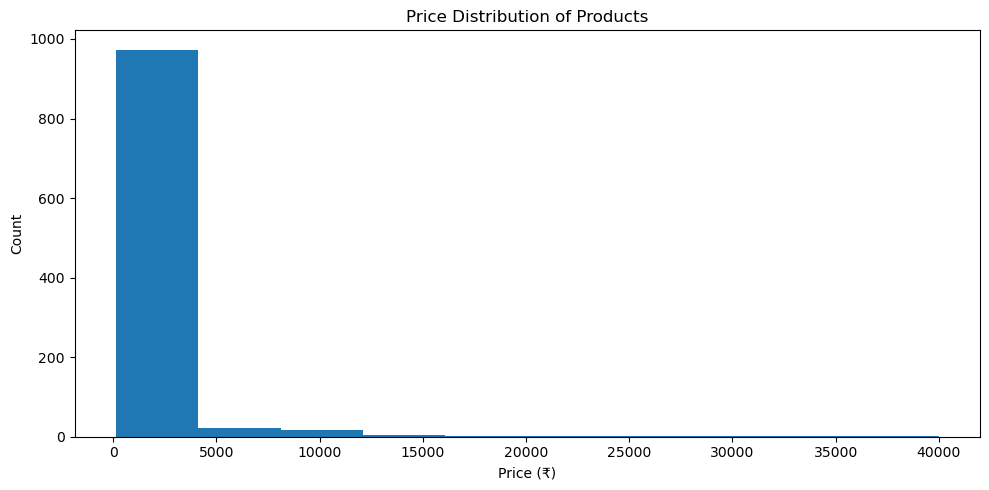

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(df["price"], bins=10)
plt.title("Price Distribution of Products")
plt.xlabel("Price (₹)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("Price_Distribution_of_Products.png")
plt.show()

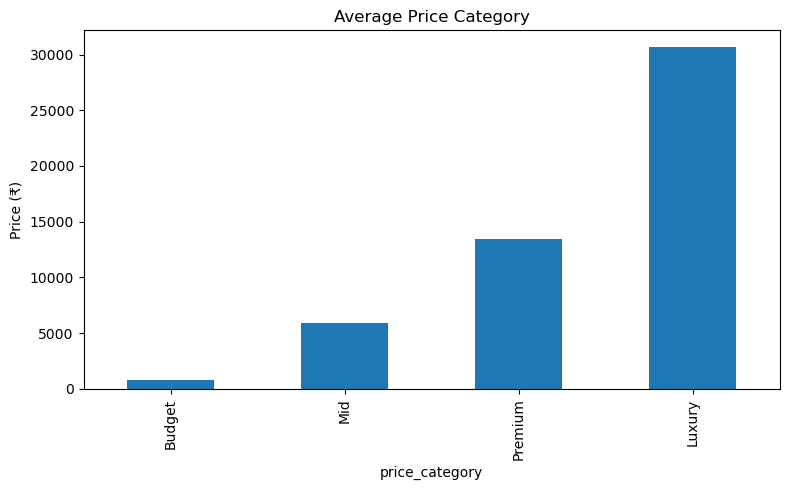

In [20]:
df.groupby("price_category", observed=True)["price"].mean().plot(kind="bar", figsize=(8,5))
plt.title("Average Price Category")
plt.ylabel("Price (₹)")
plt.tight_layout()
plt.savefig("Average_Price_Category")
plt.show()

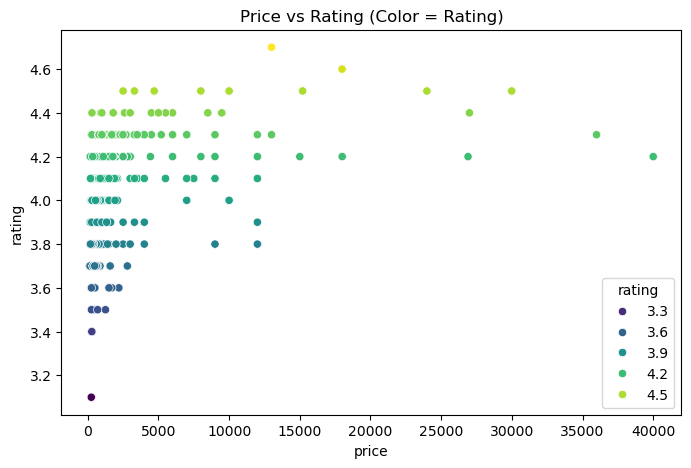

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="price",
    y="rating",
    hue="rating",
    palette="viridis"
)
plt.title("Price vs Rating (Color = Rating)")
plt.savefig("Price_vs_rating.png")
plt.show()

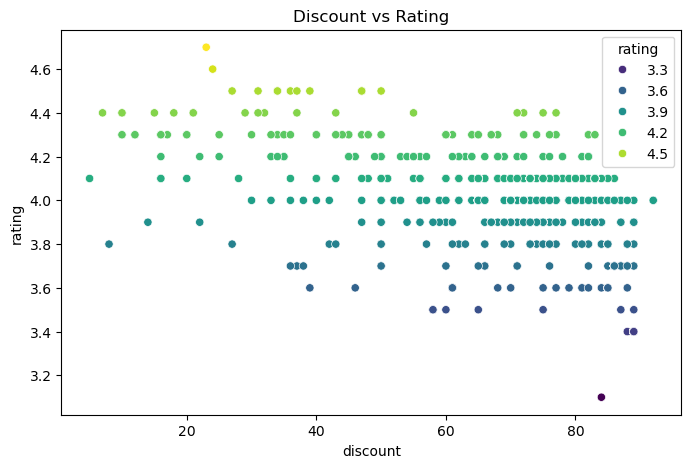

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(
                data=df, 
                x="discount", 
                y= "rating",
                hue="rating",
                palette="viridis"
               )
plt.title("Discount vs Rating")
plt.savefig("Discount_vs_Rating.png")
plt.show()

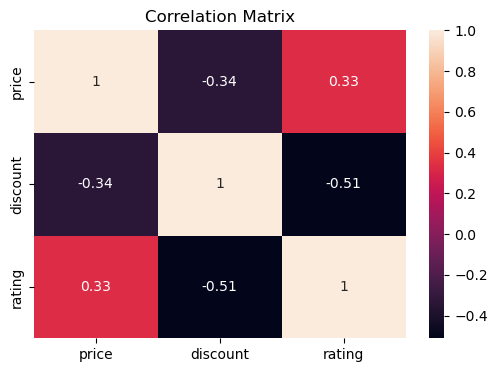

In [23]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["price", "discount", "rating"]].corr(), annot=True)
plt.title("Correlation Matrix")
plt.savefig("Correlation_Matrix.png")
plt.show()